### Introducción
En este trabajo, nos enfocaremos en el Análisis de Componentes Principales (PCA) y el método k-NN para clasificar distintos tipos de vinos. Utilizaremos un dataset que contiene diversas características de los vinos. El PCA nos ayudará a reducir la complejidad de estos datos, mientras que el k-NN los clasificará según similitudes con sus vecinos cercanos en el espacio de atributos. 


### Ejercicio 1

##### a) Descarga de datos
Para nuestro trabajo práctico, emplearemos las bibliotecas NumPy para la creación de las funciones, Matplotlib para gráficos en Python y Pandas para el importado y manejo de datasets. Observamos también que NumPy trabaja por defecto con la doble precisión float64.


In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd


vinos = pd.read_csv('wine.csv').to_numpy()

##### b) Separar los datos en variables independientes (X) y dependiente (Y).

In [2]:
var_dependiente = vinos[:,-1]

var_independiente = vinos[:, :13]

##### c) Normalizar y centrar los datos.

In [3]:
def promedio_columna(matriz, col):
    return np.sum(matriz[:, col]) / matriz.shape[0]

def desvio_estandar_columna(matriz, col):
    media = promedio_columna(matriz, col)
    suma = np.sum((matriz[:, col] - media) ** 2)
    return np.sqrt(suma / matriz.shape[0])

def normaliza(D):
    filas, columnas = D.shape
    for i in range(columnas):
        media = promedio_columna(D, i)
        sd = desvio_estandar_columna(D, i)
        D[:, i] = (D[:, i] - media) / sd
    return D
    

normalizados = normaliza(var_independiente)
normaliza(var_independiente)


array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

Hacer este paso es importante pues, con esto hacemos que todas las variables tengan media 0. Como PCA identifica las direcciones en las que la varianza es mayor, entonces las direcciones deben ser comparables. Si no las escalamos, entonces las variables que tengan mayor escala dominarán al resto.

##### d) Calcular la matriz de covarianza

In [4]:
def cov(D):
    n = D.shape[0]
    Dt = D.T
    
    return (1/n)*(Dt@D)
A = cov(normalizados)
cov(normalizados)

array([[ 1.        ,  0.09439694,  0.2115446 , -0.31023514,  0.27079823,
         0.28910112,  0.23681493, -0.15592947,  0.13669791,  0.5463642 ,
        -0.0717472 ,  0.07234319,  0.64372004],
       [ 0.09439694,  1.        ,  0.16404547,  0.2885004 , -0.0545751 ,
        -0.335167  , -0.41100659,  0.29297713, -0.22074619,  0.24898534,
        -0.56129569, -0.36871043, -0.19201056],
       [ 0.2115446 ,  0.16404547,  1.        ,  0.44336719,  0.28658669,
         0.12897954,  0.11507728,  0.18623045,  0.00965194,  0.25888726,
        -0.07466689,  0.00391123,  0.22362626],
       [-0.31023514,  0.2885004 ,  0.44336719,  1.        , -0.08333309,
        -0.32111332, -0.35136986,  0.36192172, -0.19732684,  0.01873198,
        -0.27395522, -0.27676855, -0.44059693],
       [ 0.27079823, -0.0545751 ,  0.28658669, -0.08333309,  1.        ,
         0.21440123,  0.19578377, -0.25629405,  0.23644061,  0.19995001,
         0.0553982 ,  0.06600394,  0.39335085],
       [ 0.28910112, -0.335167

 En la matriz de covarianza la diagonal representa la varianza de cada variable con sigo misma, los demás elementos representan la covarianza entre las variables. 
En PCA, la matriz de covarianza se utiliza para calcular los autovalores y autovectores que representan las direcciones y la importancia de la variabilidad en los datos. La matriz de covarianza representa como las varibles de un conjunto de datos varian entre ellas (sus relaciones entre si, dicho de otra manera). Por esto, nuestra matriz de covarianza tiene dimensión 13m representando a cada una de las relaciones entre las 13 variables dependientes del conjunto de datos.

##### e) Creamos la función para calcular autovalor maximo y su autovector asociado

In [5]:
def metodoDeLaPotencia(A):
    M = A.copy()
    n = A.shape[0]
    x = np.random.rand(n)
    
    for i in range(200):
        x = np.dot(M, x)
        x = x / np.linalg.norm(x)
    
    lambdaa = np.dot(np.dot(x.T, M), x) / np.dot(x.T, x)
    
    return lambdaa, x

autovalor1, autovector1 = metodoDeLaPotencia(A)
print("autovalor", autovalor1)
print("autovector", autovector1)

autovalor 4.705850252990422
autovector [ 0.1443294  -0.24518758 -0.00205106 -0.23932041  0.14199204  0.39466085
  0.4229343  -0.2985331   0.31342949 -0.0886167   0.29671456  0.37616741
  0.28675223]


Para encontrar el máximo autovalor y su autovector asociado utilizamos el método de la potencia que es una técnica para encontrar el mayor autovalor y su correspondiente autovector de una matriz. Se basa en la multiplicación sucesiva de la matriz original por un vector inicial (que elegimos que sea aleatorio), seguido de la normalización de este vector para converger hacia el autovector correspondiente al mayor autovalor.

##### f) Creamos la función que utiliza el método de la deflación para encontrar todos los autovalores y sus autovectores asociados

In [6]:
def deflacion(A, k):
    M = A.copy()
    autovalores = np.zeros(k)
    autovectores = np.zeros((k,k))
    
    
    for i in range(k):
        autoval, autovec = metodoDeLaPotencia(M)
        autovalores[i] = autoval
        autovectores[:, i] = autovec
        
        v = autovec.reshape(-1,1)
        M -= autoval * np.dot(v, v.T)
    
    return autovalores, autovectores

        
autoval, autovec = deflacion(A, 13)
print("Autovalores:", autoval)
print("Autovectores:", autovec)

Autovalores: [4.70585025 2.49697373 1.44607197 0.91897392 0.85322818 0.64165703
 0.55102831 0.34849736 0.28887994 0.25090248 0.22578864 0.16877023
 0.10337794]
Autovectores: [[ 0.1443294   0.48365155 -0.20738262  0.01785648  0.26566364  0.21353865
  -0.05639636  0.39613926  0.50861912  0.21160473 -0.22591696 -0.26628645
   0.01496997]
 [-0.24518758  0.22493093  0.08901289 -0.53689031 -0.03521324  0.53681385
   0.42052391  0.06582674 -0.07528304 -0.30907994  0.07648554  0.12169604
   0.02596375]
 [-0.00205106  0.31606881  0.6262239   0.21417566  0.14302532  0.15447466
  -0.14917061 -0.17026002 -0.30769445 -0.02712539 -0.49869142 -0.04962237
  -0.14121803]
 [-0.23932041 -0.0105905   0.61208035 -0.06085946 -0.0661029  -0.10082451
  -0.28696914  0.42797018  0.20044931  0.05279942  0.47931378 -0.05574287
   0.09168285]
 [ 0.14199204  0.299634    0.13075693  0.35179609 -0.72704877  0.03814394
   0.3228833  -0.15636143  0.27140257  0.06787022  0.07128891  0.06222011
   0.05677422]
 [ 0.394660

Existe un autovalor y un autovector asociado a cada una de las caracteristica de los vinos, esto se da por que en una matriz de covarianza los autovalores representan lo que varia la distribución de datos en el contexto de una caracteristica especifica. Mientras mas grande el autovalor -> más variabilidad hay entre los distintos datos de dicha caracteristica especifica.

Los autovectores son las direcciones en las cuales los datos tienen mayor variación. Cada autovector está asociado con un autovalor y define la dirección principal de mayor variación en los datos originales.

### g) Creamos un clasificador kNN

In [7]:
from collections import Counter

# Calcula la distancia euclidiana entre dos puntos
def distancia_eu(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))


# Clasificador que recibe 7 parámetros y devuelve la predicción
def clasificador_knn(vino, B, y, V, m, s, M, k=1):
    # vino: el vino a clasificar
    # B: base ya normalizada
    # y: var dependiente
    # V: autovectores
    # m: media de las columnas de B
    # s: desvios de las columnas de B
    # M: cantidad de componentes que usaremos
    # k: cantidad de vecinos cercanos del clasificador
    
    w = V[:, :M]
    T = B @ w
    vino_norm = (vino - m)/s
    vino_norm = vino_norm @ w
    
    # calcula las distancias euclideana entre el vino y los datos de entrenamiento
    distancias = [distancia_eu(vino_norm, dato_entrenamiento) for dato_entrenamiento in T] 
    
    # ordena los indices de las k distancias euclideanas mas cercanas
    k_indices_ordenados = np.argsort(distancias)[:k]
    
    # pongo las etiquetas de las k distancias euclideanas mas cercanas 
    k_etiquetas_cercanas = [y[i] for i in k_indices_ordenados]
    
    # me devuelve la etiqueta mas comun entre las etiquetas de las distancias euclideanas mas cercanas
    clasificador = Counter(k_etiquetas_cercanas).most_common(1)[0][0]
    

    return clasificador


vino = np.array([12.3, 1.5, 2.3, 11, 120, 2.8, 3.01, 0.4, 2.3, 5, 1.04, 3, 1000])
m = [promedio_columna(vinos,i) for i in range(vinos.shape[1]-1)]
s = [desvio_estandar_columna(vinos, i) for i in range(vinos.shape[1]-1)]
B = vinos[:, :13]
B = normaliza(B)
A,V = deflacion(cov(B),13)
y = vinos[:, -1]
M = 13
clasificador_knn(vino, B, y, V, m, s, M)

1.0

### Ejercicio 2
##### a) Construir una tabla donde se muestre el número de componentes principales de cada modelo y los valores de la varianza explicada, la varianza explicada relativa y la acumulada de cada componente

En todos los experimentos utilizaremos k=1 para el clasificador K-NN, para que no tengamos empates y no generemos mayor error de predicción.

In [8]:
# Separamos los datos en test y train
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(var_independiente, var_dependiente, test_size=0.2, random_state=42)


# Calculamos las varianzas explicadas por cada componente
def calculavarianzas(x_train):
    x_train = normaliza(x_train)
    x_train = cov(x_train)
    autoval, autovec = deflacion(x_train, 13)
    suma = np.sum(autoval)
    c = [autoval[i]/suma for i in range(4)]  # calculamos las varianzas explicadas para las primeras 4 componentes
    return c

varianzas = calculavarianzas(x_train)
varianzas = np.round(varianzas, 4) # con esto redondeamos
porcentaje = np.array(varianzas) * 100
porcentaje = np.round(porcentaje, 4)


# Realizamos la tabla
datos_tabla = {
    'Modelo PCA': [f"{i+1} componentes ppales" for i in range(4)],
    'Componente': [[j+1 for j in range(i+1)] for i in range(4)],
    'Varianza explicada': [varianzas[:i+1] for i in range(4)],
    'Porcentaje': [porcentaje[:i+1] for i in range(4)],
    'Acumulado': np.cumsum(porcentaje)
}

tabla = pd.DataFrame(datos_tabla)
tabla

,Modelo PCA,Componente,Varianza explicada,Porcentaje,Acumulado
0,1 componentes ppales,[1],[0.359],[35.9],35.90
1,2 componentes ppales,"[1, 2]","[0.359, 0.1869]","[35.9, 18.69]",54.59
2,3 componentes ppales,"[1, 2, 3]","[0.359, 0.1869, 0.1161]","[35.9, 18.69, 11.61]",66.20
3,4 componentes ppales,"[1, 2, 3, 4]","[0.359, 0.1869, 0.1161, 0.0737]","[35.9, 18.69, 11.61, 7.37]",73.57


Observamos cómo efectivamente la primera componente explica la mayor varianza, mientras que las siguientes componentes explican cada vez menos varianza. Notar cómo con 2 componentes ya tenemos más 54% del porcentaje acumulado, con 3 componentes sólo aumentamos un 11% del porcentaje respecto de con 2 componentes, y cuando tenemos 4 componentes aumentamos un 19% respecto de 2 componentes.

##### b) Realizar graficos que puedan mostrar los resultados obtenidos para los casos de los modelos con 1, 2 y 3 componentes principales. De acuerdo a los valores encontrados en la tabla del item anterior, cuál de los modelos sugiere utilizar para predecir el segmento al que pertenece un vino. Tener en cuenta que el comerciocuenta con una gran base de datos de clientes y se quiere poder hacer una recomendación rápidamente.

In [9]:
# En este caso hice los calculos del inciso 2a) acá por una cuestión de comodidad
x = vinos[:, :13]
y = vinos[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
m = [promedio_columna(x_train,i) for i in range(x_train.shape[1])]
s = [desvio_estandar_columna(x_train,i) for i in range(x_train.shape[1])]
x_train = normaliza(x_train)
x_test = normaliza(x_test)
A,V = deflacion(cov(x_train),13)

t1 = x_train @ V[:, :1]
t2 = x_train @ V[:, :2]
t3 = x_train @ V[:, :3]
t4 = x_train @ V[:, :4]


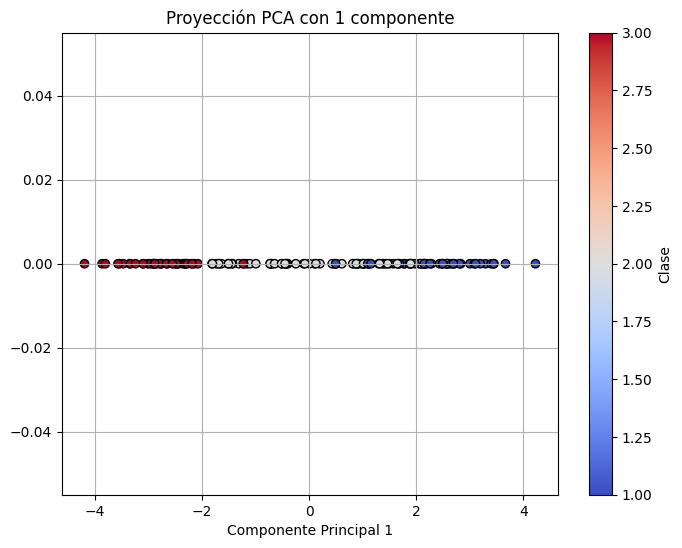

In [15]:
# 1 Componente
colors_3d = y_train
plt.figure(figsize=(8, 6))
plt.scatter(t1, np.zeros_like(t1), c=colors_3d, cmap='coolwarm', edgecolor='k')
plt.title('Proyección PCA con 1 componente')
plt.xlabel('Componente Principal 1')
plt.colorbar(label='Clase')
plt.grid(True)
plt.show()

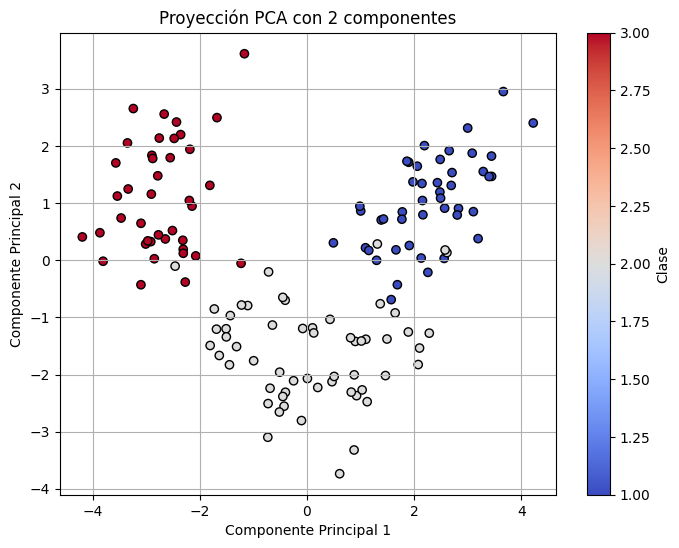

In [16]:
# 2 Componentes
plt.figure(figsize=(8, 6))
plt.scatter(t2[:, 0], t2[:, 1], c=colors_3d, cmap='coolwarm', edgecolor='k')
plt.title('Proyección PCA con 2 componentes')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Clase')
plt.grid(True)
plt.show()

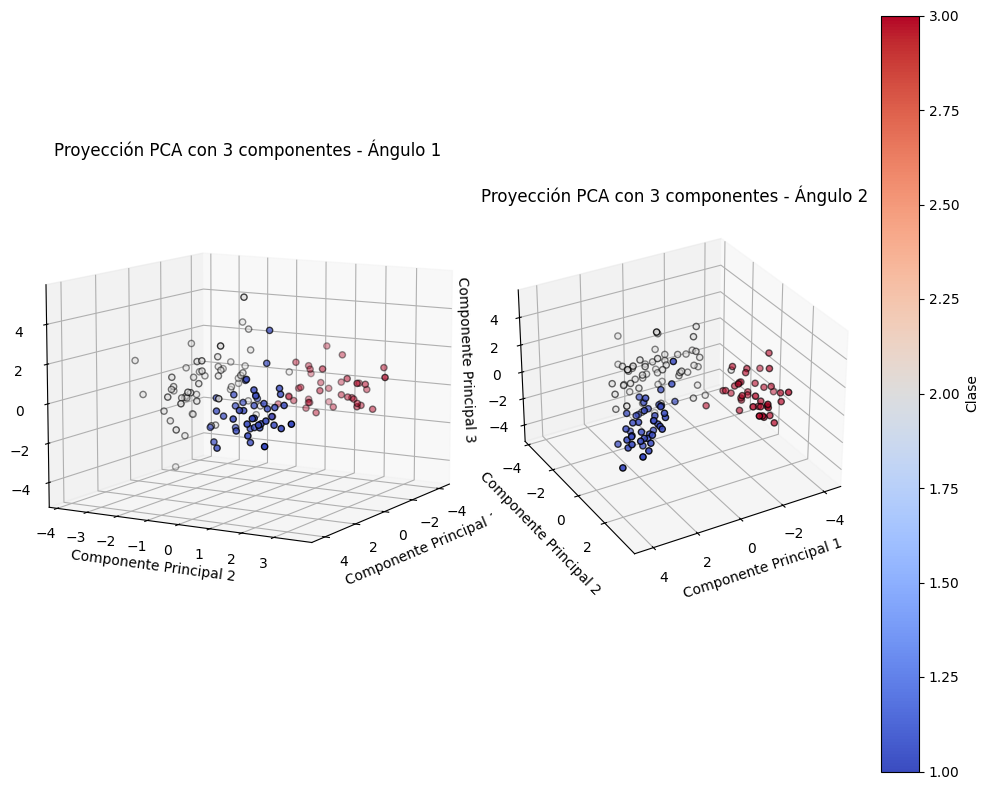

In [27]:
# 3 Componentes desde dos ángulos distintos
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

# Gráfico 1
scatter1 = ax1.scatter(t3[:, 0], t3[:, 1], t3[:, 2], c=y_train, cmap='coolwarm', edgecolor='k')
ax1.set_title('Proyección PCA con 3 componentes - Ángulo 1')
ax1.set_xlabel('Componente Principal 1')
ax1.set_ylabel('Componente Principal 2')
ax1.set_zlabel('Componente Principal 3')
ax1.view_init(elev=10, azim=30)  # Cambiar elevación y ángulo azimutal

# Gráfico 2
scatter2 = ax2.scatter(t3[:, 0], t3[:, 1], t3[:, 2], c=y_train, cmap='coolwarm', edgecolor='k')
ax2.set_title('Proyección PCA con 3 componentes - Ángulo 2')
ax2.set_xlabel('Componente Principal 1')
ax2.set_ylabel('Componente Principal 2')
ax2.set_zlabel('Componente Principal 3')
fig.colorbar(scatter2, ax=ax2, label='Clase')
ax2.view_init(elev=30, azim=60)  # Cambiar elevación y ángulo azimutal

plt.tight_layout()
plt.show()

Al reducir la dimensionalidad, vemos como los puntos se amontonan en un espacio más simple. Esto simplifica ver patrones pero puede perder detalles. Visualizar los puntos con PCA ayuda a ver tendencias y grupos, aunque da menos detalles sobre la variabilidad original.
Notamos como con una componente los puntos efectivamente se agrupan, pero la variabilidad es bastante reducida. Al aumentar el número de componentes a 2 tenemos una representación bastante mas precisa y con 3 un poco más de precisión.

###### Recomendación en base a la tabla de varianza explicada
Recomiendo utilizar dos componentes para el comercio de vinos en lugar de tres o cuatro. Dado el tamaño grande de la base de datos de clientes, optamos por dos componentes, ya que con tres solo aumentamos un 11% más en la varianza en comparación con dos, y con cuatro aumentamos solo un 19%. Esta conclusión se basa en la necesidad de proporcionar una recomendación rápida y efectiva. 

##### c) Realizar la matriz de confusion con los experimentos realizados en el ıtem (a). ¿A qué conclusiones se puede llegar?

In [13]:
# Acá hice las preds del ej 2a) por una cuestión de comodidad
y_pred1 = []
y_pred2 = []
y_pred3 = []
y_pred4 = []

for i in range(1, 5):

    if i == 1:
        for  vino in x_test:
            y_pred1.append(clasificador_knn(vino, x_train, y_train, V, m, s, i, 1))
    elif i == 2:
        for  vino in x_test:
            y_pred2.append(clasificador_knn(vino, x_train, y_train, V, m, s, i, 1))
    elif i == 3:
        for  vino in x_test:
            y_pred3.append(clasificador_knn(vino, x_train, y_train, V, m, s, i, 1))
    else: 
        for  vino in x_test:
            y_pred4.append(clasificador_knn(vino, x_train, y_train, V, m, s, i, 1))


In [14]:
def matrizDeConfusion(real, pred, etiquetas=None):
    etiquetas_unicas = np.unique(np.concatenate((real, pred))) if etiquetas is None else etiquetas
    num_etiquetas = len(etiquetas_unicas)
    matriz = np.zeros((num_etiquetas, num_etiquetas), dtype=int)

    etiqueta_a_indice = {etiqueta: i for i, etiqueta in enumerate(etiquetas_unicas)}

    for a, p in zip(real, pred):
        indice_a = etiqueta_a_indice[a]
        indice_p = etiqueta_a_indice[p]
        matriz[indice_a][indice_p] += 1

    return matriz


print("matriz para componente principal = 1: ")
print(matrizDeConfusion(y_test, y_pred1))
print("matriz para componente principal = 2: ")
print(matrizDeConfusion(y_test, y_pred2))
print("matriz para componente principal = 3: ")
print(matrizDeConfusion(y_test, y_pred3))
print("matriz para componente principal = 4: ")
print(matrizDeConfusion(y_test, y_pred4))

matriz para componente principal = 1: 
[[11  3  0]
 [ 2 11  1]
 [ 0  0  8]]
matriz para componente principal = 2: 
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]
matriz para componente principal = 3: 
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]
matriz para componente principal = 4: 
[[14  0  0]
 [ 0 13  1]
 [ 0  0  8]]


Podemos observar que con una sola componente, se producen más errores en la predicción. Sin embargo, al aumentar a dos y tres componentes, no se presentan errores. Con cuatro componentes, aunque hay más errores que con dos o tres, son menos que los de una sola componente. Esto se puede deber a un sobreajuste que afecta negativamente a la capacidad del modelo.  

### Conclusiones Finales

Considerando la extensa base de datos de clientes y la búsqueda de eficiencia, se evaluaron diferentes configuraciones de componentes principales.

El aumento en la varianza explicada acumulada al incrementar el número de componentes no resulta significativamente considerable. Al pasar de 2 a 3 componentes, se evidenció un aumento del 11% en la varianza, mientras que al incrementar de 2 a 4 componentes este porcentaje ascendió al 19%. Sin embargo, al contrastar con el rendimiento observado en las matrices de confusión, se resalta que las configuraciones con 2 y 3 componentes presentaron un desempeño superior frente a las de 1 y 4 componentes.

Concluyendo; se recomienda el uso de 2 componentes para el comercio de vinos. Esta elección se fundamenta en la necesidad del comercio de realizar recomendaciones rápidas y que cuenta con una base de datos grande, siendo este modelo el más eficiente y adecuado para la tienda de vinos, pues no es tan costoso al utilizar únicamente 2 compontentes y frece una buena representación de los datos con un rendimiento satisfactorio en la clasificación de clientes.